In [61]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [62]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [63]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [64]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [65]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

In [66]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns)


# Copy the crypto names from the original data
df_scaled['coin_id'] = df_market_data.index

# Set the coinid column as index
df_scaled.set_index('coin_id', inplace=True)


# Display sample data
print(df_scaled.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

---

### Find the Best Value for k Using the Original Data.

In [67]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [68]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(df_scaled)
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)


c:\Users\bobza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\bobza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bobza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\bobza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

In [69]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k_values": k_values, "inertia_values": inertia_values}


# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

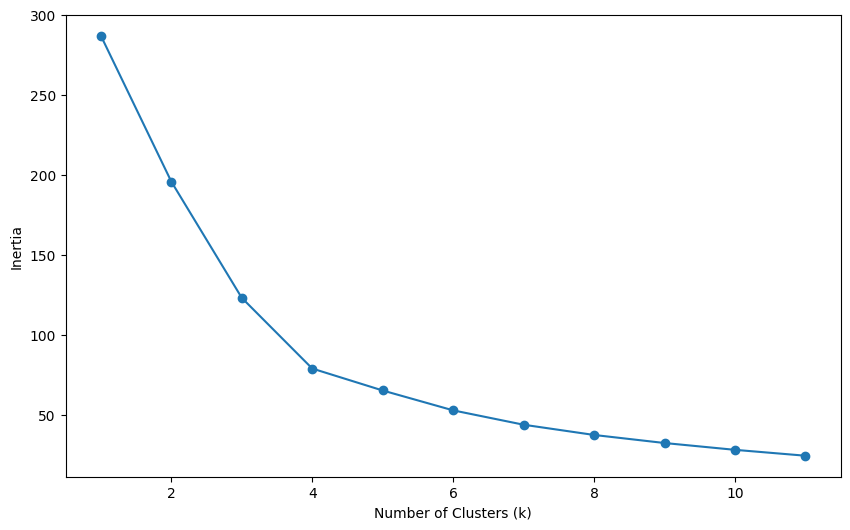

In [94]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(elbow_data["k_values"], elbow_data["inertia_values"], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 5


---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [71]:
# Initialize the K-Means model using the best value for k
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=0)

In [72]:
# Fit the K-Means model using the scaled data
kmeans.fit(df_scaled)

c:\Users\bobza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\bobza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [73]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(df_scaled)

# Print the resulting array of cluster values.
print(clusters)

[3 2 3 3 2 2 2 2 3 3 0 3 3 2 3 3 0 3 2 3 0 3 0 3 3 3 3 0 2 0 3 3 1 3 0 0 4
 0 3 3 0]


In [74]:
# Create a copy of the DataFrame
df_with_clusters = df_market_data.copy()

In [75]:
# Add a new column to the DataFrame with the predicted clusters
df_with_clusters['Cluster'] = clusters

# Display sample data
print(df_with_clusters)

                      price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                         
bitcoin                                   1.08388                     7.60278   
ethereum                                  0.22392                    10.38134   
tether                                   -0.21173                     0.04935   
ripple                                   -0.37819                    -0.60926   
bitcoin-cash                              2.90585                    17.09717   
binancecoin                               2.10423                    12.85511   
chainlink                                -0.23935                    20.69459   
cardano                                   0.00322                    13.99302   
litecoin                                 -0.06341                     6.60221   
bitcoin-cash-sv                           0.92530                     3.29641   
crypto-com-chain            

In [76]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_with_clusters.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',
    hover_cols=['coin_id'],
)

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [77]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df_scaled)

In [78]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(df_scaled)
# View the first five rows of the DataFrame. 
print(pca_data[:5])

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]


In [79]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
total_explained_variance = sum(explained_variance)

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [80]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"])
# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
df_pca["coin_id"] = df_market_data.index

# Set the coinid column as index
df_pca.set_index("coin_id", inplace=True)

# Display sample data
print(df_pca.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

In [81]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [82]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_pca)
    inertia_values_pca.append(kmeans.inertia_)

c:\Users\bobza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\bobza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bobza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\bobza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

In [83]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k_values": k_values, "inertia_values": inertia_values_pca}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

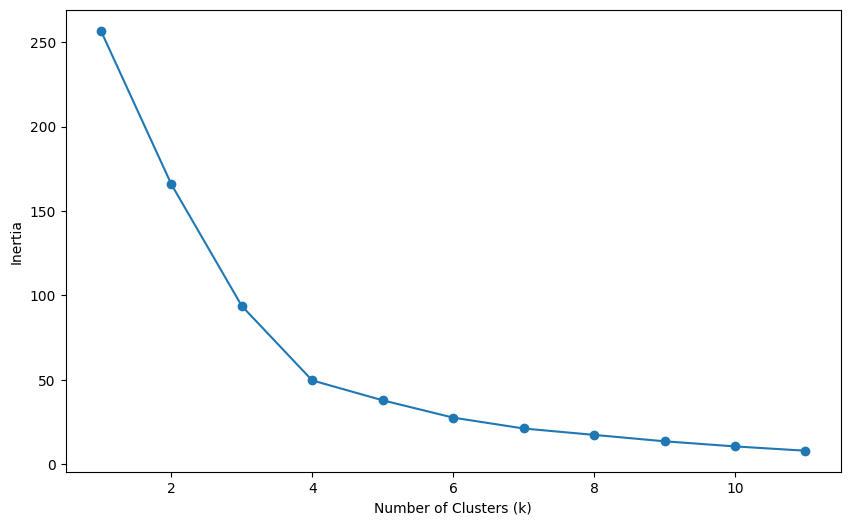

In [84]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_data_pca["k_values"], elbow_data_pca["inertia_values"], marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 5


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [85]:
# Initialize the K-Means model using the best value for k
best_k_pca = 5
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=0)

In [86]:
# Fit the K-Means model using the PCA data
clusters_pca = kmeans_pca.fit_predict(df_pca)


c:\Users\bobza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\bobza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [87]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans.predict(pca_data)
# Print the resulting array of cluster values.
print(clusters_pca)

[ 4  4  5  5 10  4  7  7  4  5  6  5  5 10  1  1  6  1  7  5  6  4  5  5
  9  5  1  6  4  0  1  1  2  1  8  9  3  6  1  5  5]


c:\Users\bobza\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [88]:
# Create a copy of the DataFrame with the PCA data
df_pca_with_clusters = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_with_clusters['Cluster'] = clusters_pca

# Display sample data
print(df_pca_with_clusters.head())

                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        4
ethereum     -0.458261  0.458466  0.952877        4
tether       -0.433070 -0.168126 -0.641752        5
ripple       -0.471835 -0.222660 -0.479053        5
bitcoin-cash -1.157800  2.041209  1.859715       10


In [89]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_pca_with_clusters.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Cluster",
    hover_cols=["coin_id"]
)
scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [90]:
# Composite plot to contrast the Elbow curves
elbow_df = pd.DataFrame(elbow_data)
elbow_df_pca = pd.DataFrame(elbow_data_pca)
elbow_plot = elbow_df.hvplot.line(x='k_values', y='inertia_values', line_color='blue', label='Original Data')
elbow_plot_pca = elbow_df_pca.hvplot.line(x='k_values', y='inertia_values', line_color='red', label='PCA Data')
composite_plot = elbow_plot * elbow_plot_pca
composite_plot

:Overlay
   .Curve.Original_Data :Curve   [k_values]   (inertia_values)
   .Curve.PCA_Data      :Curve   [k_values]   (inertia_values)

In [91]:
#df_with_clusters

In [92]:
#df_pca_with_clusters

In [93]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
scatter_original = df_with_clusters.hvplot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', by='Cluster', legend='top_left', hover_cols=['coin_id'], title='Original Data')
scatter_pca = df_pca_with_clusters.hvplot.scatter(x='PC1', y='PC2', by='Cluster', legend='top_left', hover_cols=['coin_id'], title='PCA Data')
composite_plot_clusters = scatter_original * scatter_pca
composite_plot_clusters


:Overlay
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** the PCA data, which has less features then the original data, is more accurate since it has a lower inertia when using the elbow curve.